# Introdução

Nesse notebook iremos colocar exemplos da maioria dos comandos e conceitos em SQL. Estaremos usando o BQ (BigQuery) para executar nossos comandos em tabelas a nossa disposição. Trate esse notebook como um material de ensino e consulta. Porém não se prenda a somente esse notebook, busque se familiarizar com outras fontes de conhecimento como documentações e seus colegas :)

Você pode ir executando as células abaixo após realizar a autenticação

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


Buscamos colocar seções com o nome de cada comando para auxiliar em consultas futuras.

Aproveite! 😀

# Preparação

In [ ]:
%load_ext google.colab.data_table

Usando essa extensão para IPython, podemos executar Querys do BQ (Big Query, [como acessar o BQ](#como_acessar_o_bq)) utilizando comandos magic (esses que iniciam com %). A sintaxe do comando é

```
%%bigquery --project nome_do_projeto variavel_pra_salvar_o_resultado
SEU COMANDO SQL
```

Portanto, caso queira executar algum comando visto aqui no BQ basta copiar as linhas correspondentes ao comando SQL e executa-las no projeto correspondente.

# Conceitos básicos

Já vamos ver um comando SQL em ação, porém para isso precisamos ver alguns conceitos básicos. Em SQL vamos estar realizando operações em tabelas estruturadas, onde cada coluna representa alguma quantidade. Portanto, cada coluna terá um `nome` e um `tipo`. Ao fazer uma consulta (Query em inglês) em uma tabela, devemos selecionar quais colunas desejamos visualizar com o comando `SELECT` e especificar em qual tabela estamos fazendo essa consulta. Abaixo temos as 5 primeiras linhas dessa tabela. 

| nome_grupo	 | 	ds_operadora	 | 	id_paciente	 | 	cpf	 	 	| dt_nascimento	 | 	sexo | 	ds_titularidade	 | 	dt_inclusao	 | 	dt_exclusao |
|--------|---------------------------|---------------|--------------|----------------|-------|-------------------|---------------|--------------|
| 3778	 | 	Gonçalves Silveira - ME	 | 	c58a6...	 | 	97d6b...	| 	1977-11-04	 | 	F	 | 	TITULAR	 		 | 	2019-01-02	 | 	2019-10-07  |
| 3778	 | 	Gonçalves Silveira - ME	 | 	9df72...	 | 	38882...	| 	1978-03-20	 | 	F	 | 	TITULAR	 		 | 	2019-01-05	 | 	 			|
| 3778	 | 	Gonçalves Silveira - ME	 | 	2a190...	 | 	67808...	| 	1988-03-31	 | 	M	 | 	TITULAR	 		 | 	2019-01-07	 | 	2020-10-02  |
| 3778	 | 	Pereira e Filhos	 	 | 	aed01...	 | 	cd201...	| 	1991-09-24	 | 	F	 | 	TITULAR	 		 | 	2019-01-07	 | 	 			|
| 3778	 | 	Gonçalves Silveira - ME	 | 	811ee...	 | 	5ba74...	| 	1982-10-04	 | 	F	 | 	TITULAR	 		 | 	2019-01-07	 | 	2020-10-02  |

dentre as colunas dessa tabela de exemplo, existem alguns tipos de dados diferentes. Em particular temos `string`, `datetime

## SELECT e FROM

Note que na tabela que iremos usar temos várias colunas. Para nossa primeira consulta, vamos selecionar apenas as colunas `id_paciente` e `dt_nascimento`. Indicamos isso usando o comando `SELECT` e indicando o endereço da tabela com `FROM`. Nossa tabela está no endereço `datasci-playground-dev-3180.formacao_ds.cadastro` no projeto `datasci-playground-dev-3180`

In [ ]:
%%bigquery --project datasci-playground-dev-3180 df_paciente_nascimento
SELECT 
  id_paciente, dt_nascimento
FROM `datasci-playground-dev-3180.formacao_ds.cadastro`

Ao especificar a variável `df_paciente_nascimento` a tabela resultante da consulta será armazenada nessa variável como um `DataFrame` do `Pandas`

In [ ]:
df_paciente_nascimento

id_paciente dt_nascimento
0     c58a683cf4187edf33e1b49dffa2f928bd54fdfc1d93e9...    1977-11-04
1     9df722cca6c9f400ab3e96ae755070ad57a6056dd3631d...    1978-03-20
2     2a1902d9eea6dd6d4058154a8e9980b8d0d6d574758cac...    1988-03-31
3     aed01e2362689aa5c3b70b57cd108e9be1a6b575e796a7...    1991-09-24
4     811eebdc7f94ff327143240a5bec103b5994e0576ddcff...    1982-10-04
...                                                 ...           ...
5704  657745bb1d928923c6ea5057765ae8a03b7f76de6038d0...    1982-10-19
5705  bf3620565c0b4e7d9d98ebe54c7ae67bfd9a0e39b8edcd...    2016-04-10
5706  88e631acc1e2e12edeb1ba50600a289578973aa725e0b2...    2012-09-06
5707  88e631acc1e2e12edeb1ba50600a289578973aa725e0b2...    2012-09-06
5708  623264a0453e116d196870a24eb8bbeae962d8ef013846...    1958-04-28

[5709 rows x 2 columns]

Se quisermos todas as colunas, podemos indicar apenas `*` no `SELECT`

In [ ]:
%%bigquery --project datasci-playground-dev-3180 df_cadastro
SELECT 
  *
FROM `datasci-playground-dev-3180.formacao_ds.cadastro`

In [ ]:
df_cadastro

nome_grupo             ds_operadora  \
0          3778  Gonçalves Silveira - ME   
1          3778  Gonçalves Silveira - ME   
2          3778  Gonçalves Silveira - ME   
3          3778         Pereira e Filhos   
4          3778  Gonçalves Silveira - ME   
...         ...                      ...   
5704       3778  Gonçalves Silveira - ME   
5705       3778         Pereira e Filhos   
5706       3778         Pereira e Filhos   
5707       3778  Gonçalves Silveira - ME   
5708       3778  Gonçalves Silveira - ME   

                                            id_paciente  \
0     c58a683cf4187edf33e1b49dffa2f928bd54fdfc1d93e9...   
1     9df722cca6c9f400ab3e96ae755070ad57a6056dd3631d...   
2     2a1902d9eea6dd6d4058154a8e9980b8d0d6d574758cac...   
3     aed01e2362689aa5c3b70b57cd108e9be1a6b575e796a7...   
4     811eebdc7f94ff327143240a5bec103b5994e0576ddcff...   
...                                                 ...   
5704  657745bb1d928923c6ea5057765ae8a03b7f76de6038d0...   
5705  bf3620565c0b4e7d9d98ebe54c7ae67bfd9a0e39b8edcd...   
5706  88e631acc1e2e12edeb1ba50600a289578973aa725e0b2...   
5707  88e631acc1e2e12edeb1ba50600a289578973aa725e0b2...   
5708  623264a0453e116d196870a24eb8bbeae962d8ef013846...   

                                                    cpf dt_nascimento sexo  \
0     97d6b4c2d5c9496ffe9a18844ba854880c9b4a9475c91e...    1977-11-04    F   
1     38882cd869eced2d95e5e0e76c7980befdaee887f7a9df...    1978-03-20    F   
2     678085ad28073b0e60b99cc83c60afcd91fbbc171c2b80...    1988-03-31    M   
3     cd2018fd589fbd7eda3c494e4675d91e2d30801d6833a1...    1991-09-24    F   
4     5ba743d2e463919fb853e38f1299963d697ccc5c8812b7...    1982-10-04    F   
...                                                 ...           ...  ...   
5704  cbc1be20fbdd0dbc8a4aaecc0d1662560c45e69a399c23...    1982-10-19    M   
5705  78f5a37ff0354ce2b4e4d1afca11676b6f03ead2cf71d2...    2016-04-10    M   
5706  5a7994617fba11a45ecbd5fd5a8f1c641e5721154edf3a...    2012-09-06    M   
5707  5a7994617fba11a45ecbd5fd5a8f1c641e5721154edf3a...    2012-09-06    M   
5708  56ffaef678ccc79fdefceafabc9252d50c2bdbeaeb14c3...    1958-04-28    M   

     ds_titularidade dt_inclusao dt_exclusao  
0            TITULAR  2019-01-02  2019-10-07  
1            TITULAR  2019-01-05        None  
2            TITULAR  2019-01-07  2020-10-02  
3            TITULAR  2019-01-07        None  
4            TITULAR  2019-01-07  2020-10-02  
...              ...         ...         ...  
5704      DEPENDENTE  2021-12-12        None  
5705      DEPENDENTE  2021-12-21        None  
5706      DEPENDENTE  2021-12-21        None  
5707      DEPENDENTE  2021-12-21        None  
5708      DEPENDENTE  2021-12-30        None  

[5709 rows x 9 columns]

Além disso, se não especificarmos uma variável para salvar o resultado, o resultado será mostrado na saída da célula

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  *
FROM `datasci-playground-dev-3180.formacao_ds.cadastro`

Experimente rodar algum desses comandos no BQ

[Como executar uma consulta (Query) no BQ?](#como_executar_uma_query_no_BQ)

## LIMIT
Podemos limitar a quantidade de linhas retornadas usando o comando `LIMIT`

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  *
FROM `datasci-playground-dev-3180.formacao_ds.cadastro`
LIMIT 10

## SELECT DISTINCT

Caso queiramos apenas linhas não repetidas, podemos utilizar o comando `SELECT DISTINCT`.

Vamos obter todos os valores `ds_operadora` distintos



In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT DISTINCT
  ds_operadora
FROM `datasci-playground-dev-3180.formacao_ds.cadastro`
LIMIT 10

ds_operadora
0   Gonçalves Silveira - ME
1          Pereira e Filhos
2                   Cardoso
3     Gonçalves Pinto Ltda.
4  Farias Oliveira e Filhos
5     da Costa da Mata - EI
6              Nogueira S/A
7              da Conceição
8                 das Neves
9                  da Rocha

## ALIAS
Podemos alterar o nome das colunas de dados que estamos selecionando usando um ALIAS (pseudônimo). É muito simples! Após escrever o nome da coluna original que estamos buscando, adicionamos um `AS novo_nome_da_coluna`.

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT DISTINCT
  ds_operadora,
  ds_operadora AS ds_operadora_com_novo_nome_de_coluna
FROM `datasci-playground-dev-3180.formacao_ds.cadastro`
LIMIT 10

ds_operadora ds_operadora_com_novo_nome_de_coluna
0   Gonçalves Silveira - ME              Gonçalves Silveira - ME
1          Pereira e Filhos                     Pereira e Filhos
2                   Cardoso                              Cardoso
3     Gonçalves Pinto Ltda.                Gonçalves Pinto Ltda.
4  Farias Oliveira e Filhos             Farias Oliveira e Filhos
5     da Costa da Mata - EI                da Costa da Mata - EI
6              Nogueira S/A                         Nogueira S/A
7              da Conceição                         da Conceição
8                 das Neves                            das Neves
9                  da Rocha                             da Rocha

# Operações básicas em tabelas

Agora que conhecemos os comandos mais básicos de SQL, vamos ver operações que podemos fazer para obtermos consultas mais avançadas. Essas operações são
- `WHERE`: para especificar condições de seleção de linhas
- `ORDER BY`: para ordenar as tabelas de acordo com alguma coluna
- `GROUPBY`: para realizar operações de agrupamento

Vamos ver exemplos de cada um desses comandos começando pelo `WHERE`.

## WHERE

Suponha que desejamos obter apenas os cadastros de pessoas do gênero feminino, podemos fazer isso utilizando a seguinte condição.

Obs: Irei, sempre que possível, limitar a quantidade de linhas para não poluir muito a visualização desse notebook e também para evitar consultas pesadas ao BQ. Como estamos apenas realizando alguns exemplos, não precisamos utilizar todos os dados da tabela.

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  *
FROM `datasci-playground-dev-3180.formacao_ds.cadastro`
WHERE sexo = 'F'
LIMIT 10

nome_grupo             ds_operadora  \
0       3778  Gonçalves Silveira - ME   
1       3778  Gonçalves Silveira - ME   
2       3778         Pereira e Filhos   
3       3778  Gonçalves Silveira - ME   
4       3778  Gonçalves Silveira - ME   
5       3778         Pereira e Filhos   
6       3778         Pereira e Filhos   
7       3778  Gonçalves Silveira - ME   
8       3778         Pereira e Filhos   
9       3778  Gonçalves Silveira - ME   

                                         id_paciente  \
0  c58a683cf4187edf33e1b49dffa2f928bd54fdfc1d93e9...   
1  9df722cca6c9f400ab3e96ae755070ad57a6056dd3631d...   
2  aed01e2362689aa5c3b70b57cd108e9be1a6b575e796a7...   
3  811eebdc7f94ff327143240a5bec103b5994e0576ddcff...   
4  298df3a288a42035282ee38c938aa806dafa689e5f2a47...   
5  d3cc2c59dcf2113dc822e9ab43bb8480394889f73c0054...   
6  1293c5c45b3697ded17e971a5bf092a4b60c6569a24fdc...   
7  8e7019802ee9e851a1f3a0edddf111f7c73d08a53bc452...   
8  bf9cb24440463007fd8ddd2c52da0da2b097fc11e3fbfd...   
9  1dcbd966f1501cdc501aaf4f0352b4345d71fe810da72e...   

                                                 cpf dt_nascimento sexo  \
0  97d6b4c2d5c9496ffe9a18844ba854880c9b4a9475c91e...    1977-11-04    F   
1  38882cd869eced2d95e5e0e76c7980befdaee887f7a9df...    1978-03-20    F   
2  cd2018fd589fbd7eda3c494e4675d91e2d30801d6833a1...    1991-09-24    F   
3  5ba743d2e463919fb853e38f1299963d697ccc5c8812b7...    1982-10-04    F   
4  6f003dede19f3142944c6360b19a041bcdaf42bdec97ee...    1991-12-27    F   
5  2b77bfaf9b4ad970fb20eeee720aef37ea9bdcdd023ebd...    1997-07-05    F   
6  571a0197e51589ea19d4e56999240c21e3e1b4744a1a86...    1998-06-08    F   
7  f18fc43498f3c89c7655f347ecdbc31889d45ec764b3bf...    1968-01-24    F   
8  06192cddc213f3a25893ded77ec0ceacf43c79d79c836c...    1989-12-13    F   
9  9f7201c2d2135634fd62f7a71cc70c3287ce056a3eec93...    1960-08-09    F   

  ds_titularidade dt_inclusao dt_exclusao  
0         TITULAR  2019-01-02  2019-10-07  
1         TITULAR  2019-01-05        None  
2         TITULAR  2019-01-07        None  
3         TITULAR  2019-01-07  2020-10-02  
4         TITULAR  2019-01-07  2020-08-09  
5         TITULAR  2019-01-07        None  
6         TITULAR  2019-01-07  2019-07-06  
7         TITULAR  2019-01-07  2020-12-17  
8         TITULAR  2019-01-07  2020-07-13  
9         TITULAR  2019-01-07  2020-12-20

### Tarefinha

Experimente fazer uma cópia desse notebook e fazer algumas consultas condicionais como
- Obter apenas os cadastros da `ds_operadora` de nome `Pereira e Filhos`
- Obter apenas `ds_titularidade` com valor DEPENDENTE
---

### Operadores lógicos

Podemos testar múltiplas condições utilizando operadores lógicos, mais à frente veremos todos os operadores lógicos porém adiantamos dois deles `OR` e `AND`. O `AND` irá juntar duas condições e só retornará uma linha caso essas duas condições sejam verdadeiras. O `OR` irá retornar se qualquer uma das duas forem verdadeiras (inclusive se as duas forem verdadeiras ao mesmo tempo).

A partir desses dois operadores lógicos podemos realizar condições mais complexas, por exemplo obter os cadastros da operadora `Gonçalves Silveira - ME` que são de pessoas do gênero masculino usando o AND

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  *
FROM `datasci-playground-dev-3180.formacao_ds.cadastro`
WHERE sexo = 'F' AND ds_operadora = 'Gonçalves Silveira - ME'
LIMIT 10

nome_grupo             ds_operadora  \
0       3778  Gonçalves Silveira - ME   
1       3778  Gonçalves Silveira - ME   
2       3778  Gonçalves Silveira - ME   
3       3778  Gonçalves Silveira - ME   
4       3778  Gonçalves Silveira - ME   
5       3778  Gonçalves Silveira - ME   
6       3778  Gonçalves Silveira - ME   
7       3778  Gonçalves Silveira - ME   
8       3778  Gonçalves Silveira - ME   
9       3778  Gonçalves Silveira - ME   

                                         id_paciente  \
0  c58a683cf4187edf33e1b49dffa2f928bd54fdfc1d93e9...   
1  9df722cca6c9f400ab3e96ae755070ad57a6056dd3631d...   
2  811eebdc7f94ff327143240a5bec103b5994e0576ddcff...   
3  298df3a288a42035282ee38c938aa806dafa689e5f2a47...   
4  8e7019802ee9e851a1f3a0edddf111f7c73d08a53bc452...   
5  1dcbd966f1501cdc501aaf4f0352b4345d71fe810da72e...   
6  0562fe8120299a8ed8263257abf08479b5297e7b529354...   
7  8279f328cfefc5ce1d7cbf8245168584af3b0c4ff2e981...   
8  abfded8b230cc8e9d9536adbbe79aa9cb4cf1cf258615f...   
9  23edac738b44f608db4b2f9e78b831b70954575a7f7cce...   

                                                 cpf dt_nascimento sexo  \
0  97d6b4c2d5c9496ffe9a18844ba854880c9b4a9475c91e...    1977-11-04    F   
1  38882cd869eced2d95e5e0e76c7980befdaee887f7a9df...    1978-03-20    F   
2  5ba743d2e463919fb853e38f1299963d697ccc5c8812b7...    1982-10-04    F   
3  6f003dede19f3142944c6360b19a041bcdaf42bdec97ee...    1991-12-27    F   
4  f18fc43498f3c89c7655f347ecdbc31889d45ec764b3bf...    1968-01-24    F   
5  9f7201c2d2135634fd62f7a71cc70c3287ce056a3eec93...    1960-08-09    F   
6  686c4a5863dbbd81a1742769abec05530bb9a2c63ef827...    1982-06-18    F   
7  b5d41529f73dc228e223f2a5f4ad9401020159af97fe6c...    1962-07-14    F   
8  8ad3c30907bd55e5a20da45c6853958ddacbf826c9bd36...    1988-06-29    F   
9  e60a64e97de40387ffe6f3980f7db9179260e17fc47801...    1973-01-04    F   

  ds_titularidade dt_inclusao dt_exclusao  
0         TITULAR  2019-01-02  2019-10-07  
1         TITULAR  2019-01-05        None  
2         TITULAR  2019-01-07  2020-10-02  
3         TITULAR  2019-01-07  2020-08-09  
4         TITULAR  2019-01-07  2020-12-17  
5         TITULAR  2019-01-07  2020-12-20  
6         TITULAR  2019-02-09  2021-11-30  
7         TITULAR  2019-02-09        None  
8         TITULAR  2019-02-19  2020-09-24  
9         TITULAR  2019-02-19  2020-11-23

## ORDER BY

Podemos ordenar uma tabela pelos valores de uma (ou mais) coluna(s) utilizando o comando `ORDER BY`. Embora não tenhamos trabalhado com dados do tipo `date` (veremos mais à frente), vamos ordenar a tabela a partir da coluna `dt_nascimento`

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  *
FROM `datasci-playground-dev-3180.formacao_ds.cadastro`
ORDER BY dt_nascimento
LIMIT 10

Note que a tabela ficou em ordem crescente de datas de nascimento. Se quisermos a ordem decrescente podemos especificar usando a palavra-chave `DESC`

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  *
FROM `datasci-playground-dev-3180.formacao_ds.cadastro`
ORDER BY dt_nascimento DESC
LIMIT 10

Podemos também ordenar a tabela por múltiplas colunas

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  *
FROM `datasci-playground-dev-3180.formacao_ds.cadastro`
ORDER BY dt_inclusao, sexo
LIMIT 100

Dessa forma, em caso de empate na ordenação pela primeira coluna, utiliza-se a segunda coluna para desempatar a ordem. Podemos especificar quantas colunas quisermos para ordenar nossa tabela.

Nesse caso estamos ordenando valores do tipo `string` a qual é ordenada alfabeticamente.

Por fim, podemos especificar pra cada coluna a direção da ordenação

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  *
FROM `datasci-playground-dev-3180.formacao_ds.cadastro`
ORDER BY dt_inclusao DESC, sexo ASC
LIMIT 100

## GROUP BY

A operação de agrupamento permite agrupar nossos dados de acordo com os valores de uma (ou mais) colunas. Pode-se perguntar para quê isso é útil, e a resposta é: para calcular valores agregados (por exemplo, médias, soma total, etc) em cada um desses grupos.

**Para motivar** isso, vamos supor que queiramos calcular a quantidade de pacientes na nossa tabela de cadastro, como faríamos isso? Bom, começaríamos obtendo todos os nomes de operadoras

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT DISTINCT
  ds_operadora,
FROM `datasci-playground-dev-3180.formacao_ds.cadastro`

ds_operadora
0    Gonçalves Silveira - ME
1           Pereira e Filhos
2                    Cardoso
3      Gonçalves Pinto Ltda.
4   Farias Oliveira e Filhos
5      da Costa da Mata - EI
6               Nogueira S/A
7               da Conceição
8                  das Neves
9                   da Rocha
10         da Mota Cunha S/A
11                  Silveira
12                   da Mota
13               da Luz - EI
14        Oliveira Souza S/A
15              Monteiro S/A
16                     Viana
17   Teixeira Gonçalves - ME
18           Melo Pinto - ME
19              da Paz Ltda.
20                Fogaça S/A
21                  da Costa
22        Sales Freitas S.A.
23        Rocha Vieira Ltda.

Em seguida poderíamos fazer a contagem de quantos pacientes tem pra cada operadora manualmente:

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT DISTINCT
  ds_operadora,
  id_paciente
FROM `datasci-playground-dev-3180.formacao_ds.cadastro`
WHERE ds_operadora = 'Gonçalves Silveira - ME'

ds_operadora  \
0     Gonçalves Silveira - ME   
1     Gonçalves Silveira - ME   
2     Gonçalves Silveira - ME   
3     Gonçalves Silveira - ME   
4     Gonçalves Silveira - ME   
...                       ...   
4899  Gonçalves Silveira - ME   
4900  Gonçalves Silveira - ME   
4901  Gonçalves Silveira - ME   
4902  Gonçalves Silveira - ME   
4903  Gonçalves Silveira - ME   

                                            id_paciente  
0     c58a683cf4187edf33e1b49dffa2f928bd54fdfc1d93e9...  
1     9df722cca6c9f400ab3e96ae755070ad57a6056dd3631d...  
2     2a1902d9eea6dd6d4058154a8e9980b8d0d6d574758cac...  
3     811eebdc7f94ff327143240a5bec103b5994e0576ddcff...  
4     b7814c66fef3de724b628a1ea44f6b99243c3607bca692...  
...                                                 ...  
4899  74ab8534f6b575e6996b84daaad54c66812dd0791efdf1...  
4900  2e03c0364307490bd3d737d32f4728ba9359ac8330f501...  
4901  657745bb1d928923c6ea5057765ae8a03b7f76de6038d0...  
4902  88e631acc1e2e12edeb1ba50600a289578973aa725e0b2...  
4903  623264a0453e116d196870a24eb8bbeae962d8ef013846...  

[4904 rows x 2 columns]

Legal, obtemos 4904 entradas com `id_paciente` únicos. Agora basta anotarmos e continuar seguindo na nossa lista de operadores.

É fácil ver que isso seria um processo muito trabalhoso. E é exatamente nisso que a operação `GROUP BY` nos ajuda. Ao definir um grupo, podemos usar funções de agregação das subtabelas (no nosso caso, cada subtabela seria a tabela de cada operadora).

Veja como fica mais fácil realizar o que queríamos com o `GROUP BY`

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  ds_operadora,
  COUNT(id_paciente) AS cnt_ids
FROM `datasci-playground-dev-3180.formacao_ds.cadastro`
GROUP BY ds_operadora
LIMIT 10

ds_operadora  cnt_ids
0   Gonçalves Silveira - ME     4948
1          Pereira e Filhos      348
2                   Cardoso      125
3     Gonçalves Pinto Ltda.       29
4  Farias Oliveira e Filhos      164
5     da Costa da Mata - EI       25
6              Nogueira S/A       28
7              da Conceição        1
8                 das Neves        1
9                  da Rocha        1

Existem muitas vantagens nisso: não há trabalho manual e o resultado é uma nova tabela. Ou seja, podemos novamente usar SQL para realizar mais consultas ou agregações.



Algumas observações importantes com o `GROUP BY`: 

* O LIMIT acima só limita a tabela de saída, não a tabela de entrada (Se fosse o caso, o maior valor possível em `cnt_ids` seria `10`)
* As colunas que não fazem parte do agrupamento deverão ter alguma função de agregação, caso contrário, a query retornará um erro.

Aqui um exemplo do `GROUP BY` falhando por não termos usado funções de agregação:

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  ds_operadora,
  id_paciente
FROM `datasci-playground-dev-3180.formacao_ds.cadastro`
GROUP BY ds_operadora
LIMIT 10

Executing query with job ID: 18e12634-3f40-4b56-8431-95d47148a69e
Query executing: 0.41s


ERROR:
 400 SELECT list expression references column id_paciente which is neither grouped nor aggregated at [3:3]

(job ID: 18e12634-3f40-4b56-8431-95d47148a69e)

              -----Query Job SQL Follows-----               

    |    .    |    .    |    .    |    .    |    .    |
   1:SELECT 
   2:  ds_operadora,
   3:  id_paciente
   4:FROM `datasci-playground-dev-3180.formacao_ds.cadastro`
   5:GROUP BY ds_operadora
   6:LIMIT 10
    |    .    |    .    |    .    |    .    |    .    |


Podemos agrupar os dados por mais de uma coluna também. Nesse caso cada linha única nessas colunas agrupadas configurará um grupo diferente.

Por exemplo, supondo que queiramos agora saber quantas pessoas de cada sexo existem para cada operadora.

In [ ]:


%%bigquery --project datasci-playground-dev-3180
SELECT 
  ds_operadora,
  sexo,
  COUNT(id_paciente) AS cnt_ids,
  COUNT(DISTINCT(id_paciente)) AS cnt_unique_ids
FROM `datasci-playground-dev-3180.formacao_ds.cadastro`
GROUP BY
  ds_operadora,
  sexo
ORDER BY
  ds_operadora,
  sexo
LIMIT 25

ds_operadora sexo  cnt_ids  cnt_unique_ids
0                    Cardoso    F       70              70
1                    Cardoso    M       55              55
2   Farias Oliveira e Filhos    F      106             106
3   Farias Oliveira e Filhos    M       58              58
4                 Fogaça S/A    M        1               1
5      Gonçalves Pinto Ltda.    F       20              20
6      Gonçalves Pinto Ltda.    M        9               9
7    Gonçalves Silveira - ME    F     3056            3038
8    Gonçalves Silveira - ME    M     1892            1871
9            Melo Pinto - ME    M        1               1
10              Monteiro S/A    F        1               1
11              Nogueira S/A    F        9               9
12              Nogueira S/A    M       19              19
13        Oliveira Souza S/A    M        1               1
14          Pereira e Filhos    F      219             219
15          Pereira e Filhos    M      129             129
16        Rocha Vieira Ltda.    F        1               1
17        Rocha Vieira Ltda.    M        1               1
18        Sales Freitas S.A.    M        1               1
19                  Silveira    M        1               1
20   Teixeira Gonçalves - ME    F        1               1
21                     Viana    M        1               1
22              da Conceição    M        1               1
23                  da Costa    M        1               1
24     da Costa da Mata - EI    F       16              15

Note que estamos livres para realizar múltiplas operações de agregação, seja na mesma coluna ou em colunas diferentes. Introduzimos também o comando `DISTINCT` que realiza a operação de agregação jogando fora valores repetidos.

Para quando houverem dados quantitativos como salários, custos, número de ocorrências, etc. Poderemos usar outras funções de agregação como `SUM`, `AVG`, `MAX`, `MIN`... (respectivamente soma, média, máximo e mínimo)

Para ilustrar, vamos acessar a tabela de sinistros, que nos dá cobranças de procedimentos de saúde feitos por planos de saúde. Nessa tabela, temos códigos de procedimentos feitos `cd_tuss` e o valor que foi pago por tal procedimento `vl_pago`.

Vamos calcular algumas estatísticas pra cada tipo de procedimento

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  cd_tuss,
  SUM(vl_pago) AS soma,
  COUNT(vl_pago) AS quantidade,
  AVG(vl_pago) AS media,
  MAX(vl_pago) AS maximo,
  MIN(vl_pago) AS minimo
FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
GROUP BY cd_tuss
ORDER BY soma DESC
LIMIT 10

cd_tuss        soma  quantidade         media    maximo   minimo
0  80991092  1532259.19         235   6520.251872   6792.93  6440.63
1  10101012  1107889.43       11337     97.723333    450.00     0.00
2  10101039   254540.40        3454     73.694383    240.00  -105.79
3  60001356   219961.64          34   6469.460000   6469.46  6469.46
4  60000260   209193.58          11  19017.598182  54054.00  2457.00
5  99999935   176431.88        1220    144.616295  30780.98    -5.25
6  99999919   155077.18         724    214.195000  20849.86    -9.45
7  60001364   139840.89          22   6356.404091   6469.46  6133.93
8  60000805   129126.14         183    705.607322  19924.38     0.00
9  60001038   129091.68          46   2806.340870  21972.39     0.00

# Operações gerais
Além dos conhecimentos aprendidos acima, podemos trabalhar também com outras manipulações, como operações aritméticas, condicionais e alterações de formato de dados.

## Operações condicionais
Veremos aqui os comandos `IF` e `CASE`. Dois comandos bastante utilizados quando precisamos de uma relação "SE algo acontecer, ENTÃO retorne o valor xyz". Muitas vezes usamos isto para transformar dados ou para criar colunas novas.

### IF
O comando `IF` funciona como o lemos em inglês. Colocamos uma condição que será verificada linha a linha, o valor para quando esta condição for verdadeira e o valor para quando não for  verdadeira.

In [ ]:
#Os WHERES das linhas 9 a 11 foram colocados para retornar menos valores apenas. Não tem relação com a função IF
%%bigquery --project datasci-playground-dev-3180
SELECT 
  id_atendimento,
  vl_pago,
  IF(vl_pago>1000,"Procedimento caro","Procedimento barato") AS classificacao_procedimento
FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
WHERE
  vl_pago >500
  AND
  vl_pago < 1500
ORDER BY vl_pago

id_atendimento  vl_pago classificacao_procedimento
0     350043988197500   500.98        Procedimento barato
1     471983487996887   501.90        Procedimento barato
2     448877365145886   502.07        Procedimento barato
3      66102593032770   502.17        Procedimento barato
4     571096244906598   503.03        Procedimento barato
...               ...      ...                        ...
1808  551173560548941  1486.48          Procedimento caro
1809  592969276416661  1486.49          Procedimento caro
1810  182834249627603  1488.50          Procedimento caro
1811  348306604568150  1494.60          Procedimento caro
1812  200690304178788  1498.26          Procedimento caro

[1813 rows x 3 columns]

### CASE
O `CASE` é uma alternativa ao `IF` pois nos permite encadear várias verificações ao mesmo tempo sem ter que fazer `IF`s dentro de `IF`s. Facilita em muito a construção e leitura das queries. 

É normalmente usado com `WHEN` para gerar a comparação, seguido de um `THEN` para quando a comparação é verdadeira e um `ELSE` para a última comparação não verdadeira. Por fim, usamos o `END` para finalizar o início do `CASE`.

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  id_atendimento,
  vl_pago,
  CASE
    WHEN vl_pago > 20000 THEN "Extremamente caro"
    WHEN vl_pago > 5000  THEN "Muito caro"
    WHEN vl_pago > 1000  THEN "Caro"
    WHEN vl_pago > 500   THEN "Normal"
    WHEN vl_pago > 250   THEN "Barato"
    WHEN vl_pago > 0     THEN "Muito barato"
    ELSE "Reembolso"
  END AS classificacao_procedimento
FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
WHERE
  vl_pago < 21000
ORDER BY vl_pago

id_atendimento   vl_pago classificacao_procedimento
0       919787003758288   -400.04                  Reembolso
1       451342322667992   -400.04                  Reembolso
2       622260403032804   -400.00                  Reembolso
3       990075656998708   -400.00                  Reembolso
4       560178404125090   -179.44                  Reembolso
...                 ...       ...                        ...
126386  645319471643199  15444.00                 Muito caro
126387  326759686578924  17760.00                 Muito caro
126388  392113297187429  18293.68                 Muito caro
126389  452887712769305  19924.38                 Muito caro
126390  473312635363063  20849.86          Extremamente caro

[126391 rows x 3 columns]

A lógica do `CASE` é muito importante. Se errarmos a linha lógica podemos fazer com que nosso comando não passe por todas as etapas. O exemplo abaixo tem uma falha de lógica. Vocês conseguem achar o que está ocorrendo? 

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  id_atendimento,
  vl_pago,
  CASE
    WHEN vl_pago > 20000 THEN "Extremamente caro"
    WHEN vl_pago > 500   THEN "Normal"
    WHEN vl_pago > 5000  THEN "Muito caro"
    WHEN vl_pago > 1000  THEN "Caro"    
    WHEN vl_pago > 0     THEN "Muito barato"
    WHEN vl_pago > 250   THEN "Barato"
    ELSE "Reembolso"
  END AS classificacao_procedimento
FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
WHERE
  vl_pago < 21000
ORDER BY vl_pago

id_atendimento   vl_pago classificacao_procedimento
0       919787003758288   -400.04                  Reembolso
1       451342322667992   -400.04                  Reembolso
2       622260403032804   -400.00                  Reembolso
3       990075656998708   -400.00                  Reembolso
4       560178404125090   -179.44                  Reembolso
...                 ...       ...                        ...
126386  645319471643199  15444.00                     Normal
126387  326759686578924  17760.00                     Normal
126388  392113297187429  18293.68                     Normal
126389  452887712769305  19924.38                     Normal
126390  473312635363063  20849.86          Extremamente caro

[126391 rows x 3 columns]

## Operações aritméticas
Podemos criar colunas utilizando as operações matemáticas como estamos acostumados. Apesar de termos comandos nativos como `SUM` e `AVG`, temos liberdade de fazer alguns cálculos com o SQL.

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  id_atendimento,
  vl_pago,
  qt_lancamento,
  vl_pago/qt_lancamento AS valor_por_lancamento
FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
ORDER BY vl_pago

Executing query with job ID: 5051c710-b84c-40db-848f-70e06145da9e
Query executing: 0.64s


ERROR:
 400 division by zero: 0 / 0

(job ID: 5051c710-b84c-40db-848f-70e06145da9e)

                     -----Query Job SQL Follows-----                     

    |    .    |    .    |    .    |    .    |    .    |    .    |
   1:SELECT 
   2:  id_atendimento,
   3:  vl_pago,
   4:  qt_lancamento,
   5:  vl_pago/qt_lancamento AS valor_por_lancamento
   6:FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
   7:ORDER BY vl_pago
    |    .    |    .    |    .    |    .    |    .    |    .    |


O que houve? Divisão por zero. Temos que incluir alguma lógica que não faça a divisão quando o valor de `qt_lancamento` for igual a zero. Já vimos algumas maneiras de fazer isto. Aqui, usaremos o WHERE e retiraremos dos dados tudo que possui `qt_lancamento = 0`.

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  id_atendimento,
  vl_pago,
  qt_lancamento,
  vl_pago/qt_lancamento AS valor_por_lancamento
FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
WHERE qt_lancamento > 0
LIMIT 50

id_atendimento  vl_pago  qt_lancamento  valor_por_lancamento
0   691872632059186   105.79            1.0                105.79
1   784388394561959     0.00            1.0                  0.00
2   352021214506766     0.00           15.0                  0.00
3   334508013759185     0.00            1.0                  0.00
4   825565555724414   549.42            1.0                549.42
5   769547783033128     0.00            1.0                  0.00
6   606332975122327   100.00            1.0                100.00
7   252758561149361   100.00            1.0                100.00
8   513706807823272    35.83            1.0                 35.83
9   740259647878239   175.24            1.0                175.24
10  531542491498527   105.00            1.0                105.00
11  519537020894013   133.00            1.0                133.00
12  299283601040483   100.00            1.0                100.00
13  677881005082677   105.00            1.0                105.00
14  644538130564061    27.00            3.0                  9.00
15  286115341796566   105.00            1.0                105.00
16  288644981623351   100.00            1.0                100.00
17  571909873130679   105.00            1.0                105.00
18  491360808195202   105.00            1.0                105.00
19  224802739347216   105.00            1.0                105.00
20  281829351846464   105.00            1.0                105.00
21  972997406079096    83.60            1.0                 83.60
22  309096292406191    83.60            1.0                 83.60
23  518753594382399   105.00            1.0                105.00
24  682228186451537    27.00            1.0                 27.00
25  352897115154129    16.00            1.0                 16.00
26     988074268872    52.58            1.0                 52.58
27  113183454636180   105.00            1.0                105.00
28  137589369492807   105.00            1.0                105.00
29  415288487472339   105.00            1.0                105.00
30  763410873339124   105.00            1.0                105.00
31  208770360200243   105.00            1.0                105.00
32  803875995549573   105.00            1.0                105.00
33  743087041458657   105.00            1.0                105.00
34  953910447243948   105.00            1.0                105.00
35  845404403163078   105.00            1.0                105.00
36  421951526703027   105.00            1.0                105.00
37  872460793076003   105.00            1.0                105.00
38  413537398851405   105.00            1.0                105.00
39  103000002794320   105.00            1.0                105.00
40  431908281801022     9.00            1.0                  9.00
41  276390713736165     9.00            1.0                  9.00
42  682346633345909   100.00            1.0                100.00
43  966528244103193    18.00            1.0                 18.00
44  703375380673977   105.00            1.0                105.00
45  411983899821371   105.00            1.0                105.00
46  901552419907671   105.00            1.0                105.00
47  845523035005194   105.00            1.0                105.00
48  141770013274580   105.00            1.0                105.00
49  285541909992915   105.00            1.0                105.00

## CASTING
Podemos alterar o tipo de uma variável ao selecionarmos-a. Para isto, usamos a função `CAST` (ou sua versão segura, o `SAFE_CAST`).

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  id_atendimento,
  vl_pago,
  CAST(vl_pago AS INT64) AS vl_pago_INTEIRO
FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
WHERE vl_pago > 0
LIMIT 50

id_atendimento  vl_pago  vl_pago_INTEIRO
0   691872632059186   105.79              106
1   825565555724414   549.42              549
2   606332975122327   100.00              100
3   252758561149361   100.00              100
4   513706807823272    35.83               36
5   740259647878239   175.24              175
6   531542491498527   105.00              105
7   519537020894013   133.00              133
8   299283601040483   100.00              100
9   677881005082677   105.00              105
10  644538130564061    27.00               27
11  286115341796566   105.00              105
12  288644981623351   100.00              100
13  571909873130679   105.00              105
14  491360808195202   105.00              105
15  224802739347216   105.00              105
16  281829351846464   105.00              105
17  972997406079096    83.60               84
18  309096292406191    83.60               84
19  518753594382399   105.00              105
20  682228186451537    27.00               27
21  352897115154129    16.00               16
22     988074268872    52.58               53
23  113183454636180   105.00              105
24  137589369492807   105.00              105
25  415288487472339   105.00              105
26  763410873339124   105.00              105
27  208770360200243   105.00              105
28  803875995549573   105.00              105
29  743087041458657   105.00              105
30  953910447243948   105.00              105
31  845404403163078   105.00              105
32  421951526703027   105.00              105
33  872460793076003   105.00              105
34  413537398851405   105.00              105
35  103000002794320   105.00              105
36  431908281801022     9.00                9
37  276390713736165     9.00                9
38  682346633345909   100.00              100
39  966528244103193    18.00               18
40  703375380673977   105.00              105
41  411983899821371   105.00              105
42  901552419907671   105.00              105
43  845523035005194   105.00              105
44  141770013274580   105.00              105
45  285541909992915   105.00              105
46   27831512456807   160.65              161
47  780290792947027   160.65              161
48  579867576627404   100.00              100
49   80040212061805   105.00              105

O `SAFE_CAST` pode ser usado quando temos dados fora de um padrão dentro da tabela (por exemplo, imagine que na coluna `vl_pago` tivéssemos uma marcação como `"quarenta reais"`. `"quarenta reais"` não é um número, é uma `string`, e isto não poderia ser convertido para um `INT64`. Neste caso o `SAFE_CAST` retornaria o valor `NULL`, mas não quebraria a query).

No exemplo abaixo usaremos o `SAFE_CAST` para tentar transformar os tp_evento em `INT64` (algo que não tentaríamos na prática, mas será feito apenas a fim de exemplo do `SAFE_CAST`). Todas as linhas da coluna transformada retornarão como `NULL`.

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  id_atendimento,
  tp_evento,
  SAFE_CAST(tp_evento AS INT64) AS tp_evento_as_inteiro
FROM `datasci-playground-dev-3180.formacao_ds.cadastro`
LIMIT 50


ERROR:
 ("Failed to retrieve http://metadata.google.internal/computeMetadata/v1/instance/service-accounts/default/?recursive=true from the Google Compute Enginemetadata service. Status: 404 Response:\nb''", <google.auth.transport.requests._Response object at 0x7f9f4ff0e390>)


### PARSE_DATE
Um dos tipos de conversão mais usadas é a de conversão de `strings` para o formato de `DATE`. O `PARSE_DATE` fará isso para nós! Lembre-se de que esta função recebe dois argumentos (`PARSE_DATE(format_string, date_string)`). O primeiro argumento é a formatação da data que estamos lendo, e o segundo argumento é a data em si.



In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  dt_nascimento,
  PARSE_DATE('%Y-%m-%d', dt_nascimento) AS parsed_dt_nascimento
FROM `datasci-playground-dev-3180.formacao_ds.cadastro`
LIMIT 50

dt_nascimento parsed_dt_nascimento
0     1977-11-04           1977-11-04
1     1978-03-20           1978-03-20
2     1988-03-31           1988-03-31
3     1991-09-24           1991-09-24
4     1982-10-04           1982-10-04
5     1977-11-08           1977-11-08
6     1991-12-27           1991-12-27
7     1997-07-05           1997-07-05
8     1998-06-08           1998-06-08
9     1991-01-23           1991-01-23
10    1968-01-24           1968-01-24
11    1996-01-16           1996-01-16
12    1989-12-13           1989-12-13
13    1981-01-25           1981-01-25
14    1960-08-09           1960-08-09
15    1955-09-27           1955-09-27
16    1982-06-18           1982-06-18
17    1962-07-14           1962-07-14
18    1989-06-25           1989-06-25
19    1967-12-20           1967-12-20
20    1988-06-29           1988-06-29
21    1973-01-04           1973-01-04
22    1988-05-08           1988-05-08
23    1976-08-15           1976-08-15
24    1977-01-18           1977-01-18
25    1988-12-24           1988-12-24
26    1972-11-14           1972-11-14
27    1991-10-23           1991-10-23
28    1985-07-28           1985-07-28
29    1989-01-03           1989-01-03
30    1979-05-23           1979-05-23
31    1999-05-25           1999-05-25
32    1983-06-29           1983-06-29
33    1982-12-17           1982-12-17
34    1982-05-23           1982-05-23
35    1990-06-11           1990-06-11
36    1964-11-29           1964-11-29
37    1982-01-14           1982-01-14
38    1993-02-14           1993-02-14
39    1997-01-04           1997-01-04
40    1982-03-07           1982-03-07
41    1973-02-17           1973-02-17
42    1991-03-31           1991-03-31
43    1997-10-26           1997-10-26
44    1993-03-19           1993-03-19
45    1992-06-03           1992-06-03
46    1969-04-06           1969-04-06
47    1997-11-12           1997-11-12
48    1976-08-01           1976-08-01
49    1985-09-10           1985-09-10

É comum usarmos também o safe.PARSE_DATE, que funcionará da mesma maneira que o SAFE que vimos anteriormente. Vamos fazer um exemplo manual com uma data inexistente (31/02/2022).

Sem o `safe.`

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT
  PARSE_DATE('%Y-%m-%d', "2022-02-31") AS parsed_dt_nascimento

Executing query with job ID: 9207d6bb-be14-4608-9050-86038d599aac
Query executing: 1.09s


ERROR:
 400 Out-of-range datetime field in parsing function

(job ID: 9207d6bb-be14-4608-9050-86038d599aac)

                  -----Query Job SQL Follows-----                  

    |    .    |    .    |    .    |    .    |    .    |    .    |
   1:SELECT
   2:  PARSE_DATE('%Y-%m-%d', "2022-02-31") AS parsed_dt_nascimento
    |    .    |    .    |    .    |    .    |    .    |    .    |


Com o `safe.`

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT
  safe.PARSE_DATE('%Y-%m-%d', "2022-02-31") AS parsed_dt_nascimento

parsed_dt_nascimento
0                 None

## JOIN
Em vários casos nós teremos as informações pertinentes à nossa consulta divididas em mais de uma tabela. Neste caso, precisaremos unir as tabelas referenciando um (ou mais) dado (também chamado de chave) que as tabelas têm em comum. Isto se faz necessário pois, sem esta especificação, não saberíamos onde alocar as informações corretas.

Existem vários tipos de `JOINs`, e mais pra frente mostraremos algumas diferenças. Por enquanto, atenha-se ao entendimento de como juntar as tabelas.

Usamos estas queries com `LIMIT 1` apenas para exemplificar quais colunas temos nas bases de `cadastro` e `sinistros_transformed`. 

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  *
FROM `datasci-playground-dev-3180.formacao_ds.cadastro`
LIMIT 1

nome_grupo             ds_operadora  \
0       3778  Gonçalves Silveira - ME   

                                         id_paciente  \
0  c58a683cf4187edf33e1b49dffa2f928bd54fdfc1d93e9...   

                                                 cpf dt_nascimento sexo  \
0  97d6b4c2d5c9496ffe9a18844ba854880c9b4a9475c91e...    1977-11-04    F   

  ds_titularidade dt_inclusao dt_exclusao  
0         TITULAR  2019-01-02  2019-10-07

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  *
FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
LIMIT 1

cd_tuss prestador_codigo nome_grupo      ds_operadora  \
0  10101039             None       3778  UNIMED CURTITIBA   

                                         id_paciente   cpf   id_atendimento  \
0  a772793a49f08c7413db2102069f71b0075bdddcf8ec40...  None  492862653040134   

   vl_pago  qt_lancamento dt_atendimento dt_competencia  \
0      0.0            0.0     2019-07-11     2019-09-01   

              ds_procedimento             tp_procedimento  tp_evento   cid  \
0  CONSULTA EM PRONTO SOCORRO  CONSULTA EM PRONTO SOCORRO  Visita PS  None   

  ds_especialidade prestador_nome          procedimento_cbhpm  \
0             None           None  CONSULTA EM PRONTO SOCORRO   

    subgrupo_cbhpm especialidade_cbhpm  
0  10101-Consultas             CLM/AMB

Suponha que queiramos obter a informação da titularidade de um paciente de um exame, a fim de saber quem gasta mais, titulares ou dependentes. Perceba que esta informação (`ds_titularidade`) está presente apenas na base `cadastro`, ao passo de que as informações de custo estão presentes em `sinistros_transformed`. Precisamos juntar estas informações para fazer nossa análise de gasto.

Qual informação temos em comum nas duas bases? Mais de uma (`id_paciente` e `cpf`). Qual devemos usar? Esta pergunta é muito importante quando for fazer um `JOIN` pois podemos trazer dados incoerentes ao usar uma chave incorreta. Neste caso, será indiferente pois o `id_paciente` é um dado único para cada paciente, assim como seu CPF. Usaremos o `id_paciente` pois é uma chave anonimizada (ao passo que o CPF não).

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  cadastro.id_paciente,
  cadastro.ds_titularidade,
  sinistros_transformed.vl_pago
FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed` AS sinistros_transformed
JOIN
`datasci-playground-dev-3180.formacao_ds.cadastro` AS cadastro
ON
sinistros_transformed.id_paciente = cadastro.id_paciente
LIMIT 10

id_paciente ds_titularidade  vl_pago
0  a772793a49f08c7413db2102069f71b0075bdddcf8ec40...         TITULAR     0.00
1  586a2c5773f4b28c07d871eb4723fed9449c391872bae9...      DEPENDENTE     0.00
2  e19a633a35ab988bd558f5297c221abe92401e0d45dd58...         TITULAR   105.79
3  a772793a49f08c7413db2102069f71b0075bdddcf8ec40...         TITULAR     0.00
4  f29ecd6804d4108e0d5143815b58a8b2b3c52f2095c73d...         TITULAR     0.00
5  58fa166057738d2e533071b52c8b4c7dc091e893516558...      DEPENDENTE     0.00
6  7f55098ae3c7d41cd2abedf6cd985e02b2a135b827084d...         TITULAR     0.00
7  d2933a85ccfbc33a04a5e7b2cb3e68529a01c1f8ca8e6d...         TITULAR     0.00
8  41b8507029d7fc0d7c3f634b3d933d79dfdec485bdd5d7...         TITULAR     0.00
9  e19a633a35ab988bd558f5297c221abe92401e0d45dd58...         TITULAR     0.00

Fazendo a mesma query e selecionando também a informação `sinistros_transformed.id_paciente` (perceba que damos nomes (`ALIAS`) às tabelas de origem para orientar o código de qual tabela buscamos informações, como `tabela.dado`) vemos que neste caso os dados são sempre iguais para as duas tabelas. Isto faz sentido, afinal, estamos unindo-as através desta chave, quando o `id_paciente` é igual em ambas as tabelas.

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  cadastro.id_paciente,
  sinistros_transformed.id_paciente,
  cadastro.ds_titularidade,
  sinistros_transformed.vl_pago
FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed` AS sinistros_transformed
JOIN
`datasci-playground-dev-3180.formacao_ds.cadastro` AS cadastro
ON
sinistros_transformed.id_paciente = cadastro.id_paciente
LIMIT 10

id_paciente  \
0  a772793a49f08c7413db2102069f71b0075bdddcf8ec40...   
1  586a2c5773f4b28c07d871eb4723fed9449c391872bae9...   
2  e19a633a35ab988bd558f5297c221abe92401e0d45dd58...   
3  a772793a49f08c7413db2102069f71b0075bdddcf8ec40...   
4  f29ecd6804d4108e0d5143815b58a8b2b3c52f2095c73d...   
5  58fa166057738d2e533071b52c8b4c7dc091e893516558...   
6  7f55098ae3c7d41cd2abedf6cd985e02b2a135b827084d...   
7  d2933a85ccfbc33a04a5e7b2cb3e68529a01c1f8ca8e6d...   
8  41b8507029d7fc0d7c3f634b3d933d79dfdec485bdd5d7...   
9  e19a633a35ab988bd558f5297c221abe92401e0d45dd58...   

                                       id_paciente_1 ds_titularidade  vl_pago  
0  a772793a49f08c7413db2102069f71b0075bdddcf8ec40...         TITULAR     0.00  
1  586a2c5773f4b28c07d871eb4723fed9449c391872bae9...      DEPENDENTE     0.00  
2  e19a633a35ab988bd558f5297c221abe92401e0d45dd58...         TITULAR   105.79  
3  a772793a49f08c7413db2102069f71b0075bdddcf8ec40...         TITULAR     0.00  
4  f29ecd6804d4108e0d5143815b58a8b2b3c52f2095c73d...         TITULAR     0.00  
5  58fa166057738d2e533071b52c8b4c7dc091e893516558...      DEPENDENTE     0.00  
6  7f55098ae3c7d41cd2abedf6cd985e02b2a135b827084d...         TITULAR     0.00  
7  d2933a85ccfbc33a04a5e7b2cb3e68529a01c1f8ca8e6d...         TITULAR     0.00  
8  41b8507029d7fc0d7c3f634b3d933d79dfdec485bdd5d7...         TITULAR     0.00  
9  e19a633a35ab988bd558f5297c221abe92401e0d45dd58...         TITULAR     0.00

### Tipos de JOIN
Temos alguns tipos de `JOINs`, e o tipo escolhido alterará a lógica de quais informações virão. Segue abaixo um esquema muito utilizado para explicar a lógica dos `JOINs`.

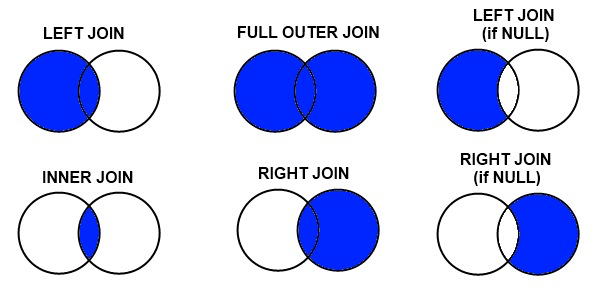

Fonte: https://stackoverflow.com/a/28598795/8175889

O primeiro `JOIN` que fizemos (nas células anteriores) foi um `INNER JOIN`. Quando não especificamos o tipo de `JOIN`, ele executa o `INNER`. Recomendamos que escreva `INNER JOIN` para facilitar a leitura e compreensão do objetivo da união dos dados.

Faremos agora um `LEFT JOIN`. A lógica é a mesma, contudo, ao usar este tipo, poderemos ter dados da primeira tabela que não encontram seu par na segunda tabela. Nos casos dos dados sem par, os dados que virão da segunda tabela, nestes casos, estarão como `NULL`.

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT 
  cadastro.id_paciente,
  sinistros_transformed.id_paciente,
  cadastro.ds_titularidade,
  sinistros_transformed.vl_pago
FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed` AS sinistros_transformed
LEFT JOIN
`datasci-playground-dev-3180.formacao_ds.cadastro` AS cadastro
ON
sinistros_transformed.id_paciente = cadastro.id_paciente
LIMIT 10

id_paciente  \
0  a772793a49f08c7413db2102069f71b0075bdddcf8ec40...   
1  586a2c5773f4b28c07d871eb4723fed9449c391872bae9...   
2  e19a633a35ab988bd558f5297c221abe92401e0d45dd58...   
3  a772793a49f08c7413db2102069f71b0075bdddcf8ec40...   
4  f29ecd6804d4108e0d5143815b58a8b2b3c52f2095c73d...   
5  58fa166057738d2e533071b52c8b4c7dc091e893516558...   
6  7f55098ae3c7d41cd2abedf6cd985e02b2a135b827084d...   
7  d2933a85ccfbc33a04a5e7b2cb3e68529a01c1f8ca8e6d...   
8  41b8507029d7fc0d7c3f634b3d933d79dfdec485bdd5d7...   
9  e19a633a35ab988bd558f5297c221abe92401e0d45dd58...   

                                       id_paciente_1 ds_titularidade  vl_pago  
0  a772793a49f08c7413db2102069f71b0075bdddcf8ec40...         TITULAR     0.00  
1  586a2c5773f4b28c07d871eb4723fed9449c391872bae9...      DEPENDENTE     0.00  
2  e19a633a35ab988bd558f5297c221abe92401e0d45dd58...         TITULAR   105.79  
3  a772793a49f08c7413db2102069f71b0075bdddcf8ec40...         TITULAR     0.00  
4  f29ecd6804d4108e0d5143815b58a8b2b3c52f2095c73d...         TITULAR     0.00  
5  58fa166057738d2e533071b52c8b4c7dc091e893516558...      DEPENDENTE     0.00  
6  7f55098ae3c7d41cd2abedf6cd985e02b2a135b827084d...         TITULAR     0.00  
7  d2933a85ccfbc33a04a5e7b2cb3e68529a01c1f8ca8e6d...         TITULAR     0.00  
8  41b8507029d7fc0d7c3f634b3d933d79dfdec485bdd5d7...         TITULAR     0.00  
9  e19a633a35ab988bd558f5297c221abe92401e0d45dd58...         TITULAR     0.00

## UNION
O `UNION` é semelhante ao `JOIN`, em uma primeira observação, mas em vez de fazer a junção de informações "horizontalmente", ele junta as informações "verticalmente". Com este comando aumentamos o número de linhas de nossa primeira tabela.

O `UNION` faz a junção buscando parear colunas, ou seja, encaixa colunas de nomes iguais das bases que estamos unindo.

`UNION ALL` une tudo, replicando linhas que possam ser duplicadas. `UNION DISTINCT` não multiplica linhas repetidas.

Vamos juntar nesta busca os nossos 100 maiores vl_pago e os 100 menores vl_pago com o `UNION`.

In [ ]:
%%bigquery --project datasci-playground-dev-3180
(SELECT 
  id_paciente,
  vl_pago
FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
ORDER BY vl_pago DESC
LIMIT 100)

UNION ALL

(SELECT 
  id_paciente,
  vl_pago
FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
ORDER BY vl_pago ASC
LIMIT 100)

id_paciente  vl_pago
0   87a35c0e89d764bc59dc51564627e2e68be81a53c1192d...  -400.04
1   87a35c0e89d764bc59dc51564627e2e68be81a53c1192d...  -400.04
2   e795ef9d643b87a0a95129cb06851ce432892f95a244c3...  -400.00
3   e795ef9d643b87a0a95129cb06851ce432892f95a244c3...  -400.00
4   a233b985cc0b035b10ac300ab86b9c4ef81bbf57001d98...  -179.44
..                                                ...      ...
95  780102b734afe02c5de0c97c648bbabdddf9f70f7541c2...     0.00
96  c84d0b4ae7159daacf47c477e0309efd83c7d8c296feb0...     0.00
97  a772793a49f08c7413db2102069f71b0075bdddcf8ec40...     0.00
98  8d50658f374687e59ae804248effc65874cf7011e8791c...     0.00
99  c2ef49dd0863a47b8476511d6fc080115ef0d732de47a9...     0.00

[100 rows x 2 columns]

Perceba que algumas linhas possuem marcações duplicadas. Neste caso, o UNION DISTINCT resolveria isto:

In [ ]:
%%bigquery --project datasci-playground-dev-3180
(SELECT 
  id_paciente,
  vl_pago
FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
ORDER BY vl_pago DESC
LIMIT 100)

UNION DISTINCT

(SELECT 
  id_paciente,
  vl_pago
FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
ORDER BY vl_pago ASC
LIMIT 100)

id_paciente    vl_pago
0    a1f1b0b20e6b47388c6cc4c0e117fb5e21b411bc88b64e...  121442.45
1    f92bfd144bc77c5933f43f5d22a34a6fafdde1b3625098...   54054.00
2    4c8bfb0de02bf9c7087f7bec06a92abbed4ac446751f0a...   46537.16
3    a1f1b0b20e6b47388c6cc4c0e117fb5e21b411bc88b64e...   45115.25
4    87838c392009c912ad9f3c3aa44e39a0836337e8f9a676...   44400.00
..                                                 ...        ...
119  d78988965828305afe127f3f04c7151efd55c37ce132e9...       0.00
120  c84d0b4ae7159daacf47c477e0309efd83c7d8c296feb0...       0.00
121  a772793a49f08c7413db2102069f71b0075bdddcf8ec40...       0.00
122  8d50658f374687e59ae804248effc65874cf7011e8791c...       0.00
123  c2ef49dd0863a47b8476511d6fc080115ef0d732de47a9...       0.00

[124 rows x 2 columns]

Mas atenção! Cuidado ao usar o UNION DISTINCT pois ele considerará como duplicatas as linhas da sua query, não as linhas da base de dados pura. Caso você escolha poucas colunas, você poderá remover informações que não eram, de fato, duplicadas.

Por fim, o que acontece quando não há casamento entre as colunas (neste caso, diferença na quantidade de colunas):

In [ ]:
%%bigquery --project datasci-playground-dev-3180
(SELECT 
  id_paciente,
  vl_pago
FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
ORDER BY vl_pago DESC
LIMIT 100)

UNION ALL

(SELECT 
  id_paciente,
  vl_pago,
  qt_lancamento
FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
ORDER BY vl_pago ASC
LIMIT 100)

Executing query with job ID: af1a4c15-4ecf-4c25-8723-eab74381b28c
Query executing: 0.85s


ERROR:
 400 Queries in UNION ALL have mismatched column count; query 1 has 2 columns, query 2 has 3 columns at [10:2]

(job ID: af1a4c15-4ecf-4c25-8723-eab74381b28c)

                     -----Query Job SQL Follows-----                     

    |    .    |    .    |    .    |    .    |    .    |    .    |
   1:(SELECT 
   2:  id_paciente,
   3:  vl_pago
   4:FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
   5:ORDER BY vl_pago DESC
   6:LIMIT 100)
   7:
   8:UNION ALL
   9:
  10:(SELECT 
  11:  id_paciente,
  12:  vl_pago,
  13:  qt_lancamento
  14:FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
  15:ORDER BY vl_pago ASC
  16:LIMIT 100)
    |    .    |    .    |    .    |    .    |    .    |    .    |


## REPLACE
Com o `REPLACE` podemos trocar pedaços de strings por outro. É muito útil para correção de dados e ajustes antes de `CAST`. Sua fórmula é `REPLACE(original_value, from_value, to_value)`, onde `original_value` é o dado em si, `from_value` é o trecho a ser substituído e `to_value` é trecho a ser adicionado.

Suponha que tenhamos que apresentar os valores pagos para um cliente, em ordem decrescente. Mas o cliente precisa que os valores decimais estejam separados por vírgula, e não por ponto. Como poderíamos proceder?

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT
  id_paciente,
  REPLACE(vl_pago, ".", ",")
  qt_lancamento
FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
ORDER BY vl_pago DESC
LIMIT 100

Executing query with job ID: f27fadec-c0b1-4f2f-b798-cc8f31cea279
Query executing: 1.36s


ERROR:
 400 No matching signature for function REPLACE for argument types: FLOAT64, STRING, STRING. Supported signatures: REPLACE(STRING, STRING, STRING); REPLACE(BYTES, BYTES, BYTES) at [3:3]

(job ID: f27fadec-c0b1-4f2f-b798-cc8f31cea279)

                     -----Query Job SQL Follows-----                     

    |    .    |    .    |    .    |    .    |    .    |    .    |
   1:SELECT
   2:  id_paciente,
   3:  REPLACE(vl_pago, ".", ",")
   4:  qt_lancamento
   5:FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
   6:ORDER BY vl_pago DESC
   7:LIMIT 100
    |    .    |    .    |    .    |    .    |    .    |    .    |


O que houve? O campo vl_pago é um float. O `REPLACE` funciona em strings. Para isto, devemos fazer um `CAST` antes do `REPLACE`.

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT
  id_paciente,
  vl_pago,
  REPLACE(CAST(vl_pago AS string), ".", ",") AS vl_pago_com_virgula
FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
ORDER BY vl_pago DESC
LIMIT 100

id_paciente    vl_pago  \
0   a1f1b0b20e6b47388c6cc4c0e117fb5e21b411bc88b64e...  121442.45   
1   f92bfd144bc77c5933f43f5d22a34a6fafdde1b3625098...   54054.00   
2   4c8bfb0de02bf9c7087f7bec06a92abbed4ac446751f0a...   46537.16   
3   a1f1b0b20e6b47388c6cc4c0e117fb5e21b411bc88b64e...   45115.25   
4   87838c392009c912ad9f3c3aa44e39a0836337e8f9a676...   44400.00   
..                                                ...        ...   
95  87838c392009c912ad9f3c3aa44e39a0836337e8f9a676...    6792.93   
96  87838c392009c912ad9f3c3aa44e39a0836337e8f9a676...    6792.93   
97  87838c392009c912ad9f3c3aa44e39a0836337e8f9a676...    6792.93   
98  87838c392009c912ad9f3c3aa44e39a0836337e8f9a676...    6792.93   
99  87838c392009c912ad9f3c3aa44e39a0836337e8f9a676...    6792.93   

   vl_pago_com_virgula  
0            121442,45  
1                54054  
2             46537,16  
3             45115,25  
4                44400  
..                 ...  
95             6792,93  
96             6792,93  
97             6792,93  
98             6792,93  
99             6792,93  

[100 rows x 3 columns]

## Subqueries and CTEs
São maneiras de realizar mais de uma query dentro de uma. Normalmente para redução de dados e facilitação de JOINs. Inicialmente isso pode parecer algo desnecessário ou redundante, mas facilita muito a leitura e debug das queries. Podemos considerar como se estivéssemos fazendo queries de maneira modular.

### CTE
Na CTE (Common Table Expression) nós criamos uma query à parte de nossa query principal. Ao criá-la, damos um nome para podermos referenciá-la em seguida. Imagine que queremos adicionar à tabela de cadastros a informação do gasto médio dos pacientes (existem maneiras mais diretas de fazermos isto. Caso você tenha pensado, fique à vontade para implementar, mas usaremos a CTE e Subquery para exemplificar).

In [ ]:
%%bigquery --project datasci-playground-dev-3180
WITH medias_vl_pago AS (
  SELECT
  id_paciente,
  AVG(vl_pago) AS media
FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
GROUP BY id_paciente
)

SELECT
  cadastro.id_paciente,
  medias_vl_pago.media
FROM `datasci-playground-dev-3180.formacao_ds.cadastro` AS cadastro
LEFT JOIN medias_vl_pago
ON cadastro.id_paciente = medias_vl_pago.id_paciente
WHERE medias_vl_pago.media IS NOT NULL
LIMIT 10

id_paciente       media
0  aed01e2362689aa5c3b70b57cd108e9be1a6b575e796a7...   55.421333
1  d3cc2c59dcf2113dc822e9ab43bb8480394889f73c0054...   48.019811
2  fa4df439d3842745653ff4655e5e5e9b116d712ee24baa...   76.215000
3  bf9cb24440463007fd8ddd2c52da0da2b097fc11e3fbfd...   25.842500
4  13d61108910239b7e0a62676d81dcd83798c79419fc6e6...   19.880833
5  ce18951d0d11552b2a67d86510517ad5a0d1c2bf310058...   65.625000
6  0562fe8120299a8ed8263257abf08479b5297e7b529354...   17.090000
7  abfded8b230cc8e9d9536adbbe79aa9cb4cf1cf258615f...   22.311400
8  17d03108b86e0547d47f2105b4c71b1d61bff88228632a...  103.333333
9  556e1086100f345a2cef2a17c2c66eed616154aeadea5a...   26.374286

### Subquery
Agora, realizaremos a mesma busca mas usando a subquery. Sua diferença é que em vez de fazê-la anteriormente no código, criamos esta query dentro da nossa principal (por isso o nome subquery). Ela fica assim:

In [ ]:
%%bigquery --project datasci-playground-dev-3180
SELECT
  cadastro.id_paciente,
  medias_vl_pago.media
FROM `datasci-playground-dev-3180.formacao_ds.cadastro` AS cadastro
LEFT JOIN (
  SELECT
    id_paciente,
    AVG(vl_pago) AS media
  FROM `datasci-playground-dev-3180.formacao_ds.sinistros_transformed`
  GROUP BY id_paciente
) AS medias_vl_pago
ON cadastro.id_paciente = medias_vl_pago.id_paciente
WHERE medias_vl_pago.media IS NOT NULL
LIMIT 10

id_paciente       media
0  aed01e2362689aa5c3b70b57cd108e9be1a6b575e796a7...   55.421333
1  d3cc2c59dcf2113dc822e9ab43bb8480394889f73c0054...   48.019811
2  fa4df439d3842745653ff4655e5e5e9b116d712ee24baa...   76.215000
3  bf9cb24440463007fd8ddd2c52da0da2b097fc11e3fbfd...   25.842500
4  13d61108910239b7e0a62676d81dcd83798c79419fc6e6...   19.880833
5  ce18951d0d11552b2a67d86510517ad5a0d1c2bf310058...   65.625000
6  0562fe8120299a8ed8263257abf08479b5297e7b529354...   17.090000
7  abfded8b230cc8e9d9536adbbe79aa9cb4cf1cf258615f...   22.311400
8  17d03108b86e0547d47f2105b4c71b1d61bff88228632a...  103.333333
9  556e1086100f345a2cef2a17c2c66eed616154aeadea5a...   26.374286

Quando usar cada uma? Parece não haver um consenso quanto às questões de otimização. Ambas parecem ter resultados muito semelhantes em velocidade, mas ao que tudo indica, a CTE pode ter vantagem se precisar ser chamada mais de uma vez (pelo fato de já ter sido rodada e armazenada inicialmente). A CTE tende a ter uma leitura mais fácil também.

Aqui há um texto que explana um pouco das diferenças e pontos positivos de cada uma: https://towardsdatascience.com/sql-for-data-analysis-subquery-vs-cte-699ef629d9eb

Ademais, não se preocupe inicialmente com isso. Quando chegar o momento de precisar de uma query com uma velocidade bem otimizada poderemos ter momentos de debate e envolver a equipe de Engenharia de Dados, que tem muita experiência nisso. Por enquanto, conhecer estas duas abordagens já é o suficiente!

# Como acessar o BQ?
<a id='como_acessar_o_bq'></a>

O Big Query é um produto do GCP (Google Cloud Computing) para armazenamento e processamento de bancos de dados. Para acessa-lo basta entrar no console do gcp ([link](https://console.cloud.google.com/)) e logar na sua conta corporativa. Você provavelmente se deparará com a seguinte página

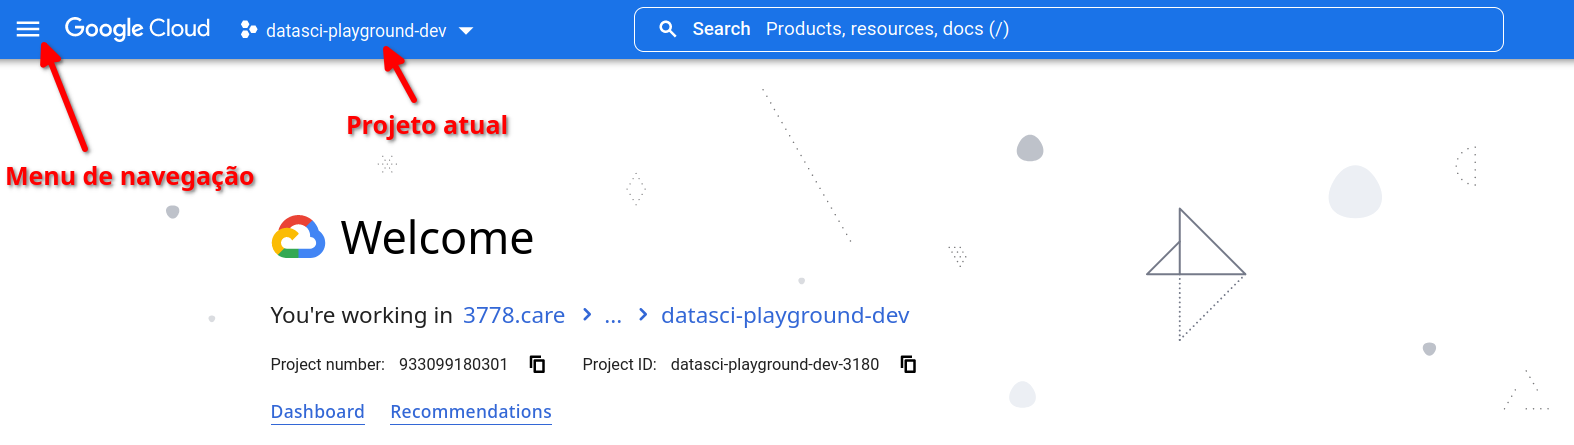

Onde no console existem vários projetos da organização 3778. Em geral, nós do time de dados usamos o projeto `datasci-playground-dev` para o desenvolvimento e experimentação. Selecione esse projeto.

No GCP existem vários outros produtos além do BQ, estes podem ser vistos clicando no menu de navegação. Sinta-se livre para dar uma olhada nesses produtos e se familiarizar com a interface. Quando estiver pronto, busque o Big Query na seção `Analytics` e selecione a ferramenta `SQL Workspace` como na imagem abaixo

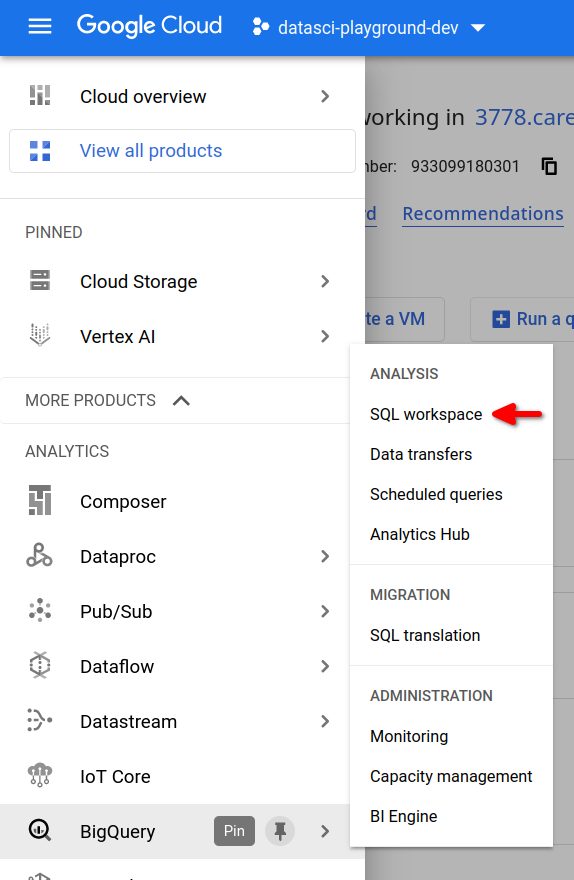

Você pode clicar no botão `Pin` para fixar essa ferramenta no topo da lista. Eu já tenho duas outras ferramentas fixadas: `Cloud Storage` (Um sistema de arquivos na nuvem) e `Vertex AI` (Onde utilizamos máquinas virtuais para desenvolver nossos projetos). Recomendo ter essas 3 ferramentas fixadas pois são frequentemente utilizadas.

# Como executar uma query no BQ?
<a id='como_executar_uma_query_no_BQ'></a>

Após executar os passos na seção [Como acessar o BQ?](#como_acessar_o_bq), você irá se deparar com a seguinte tela

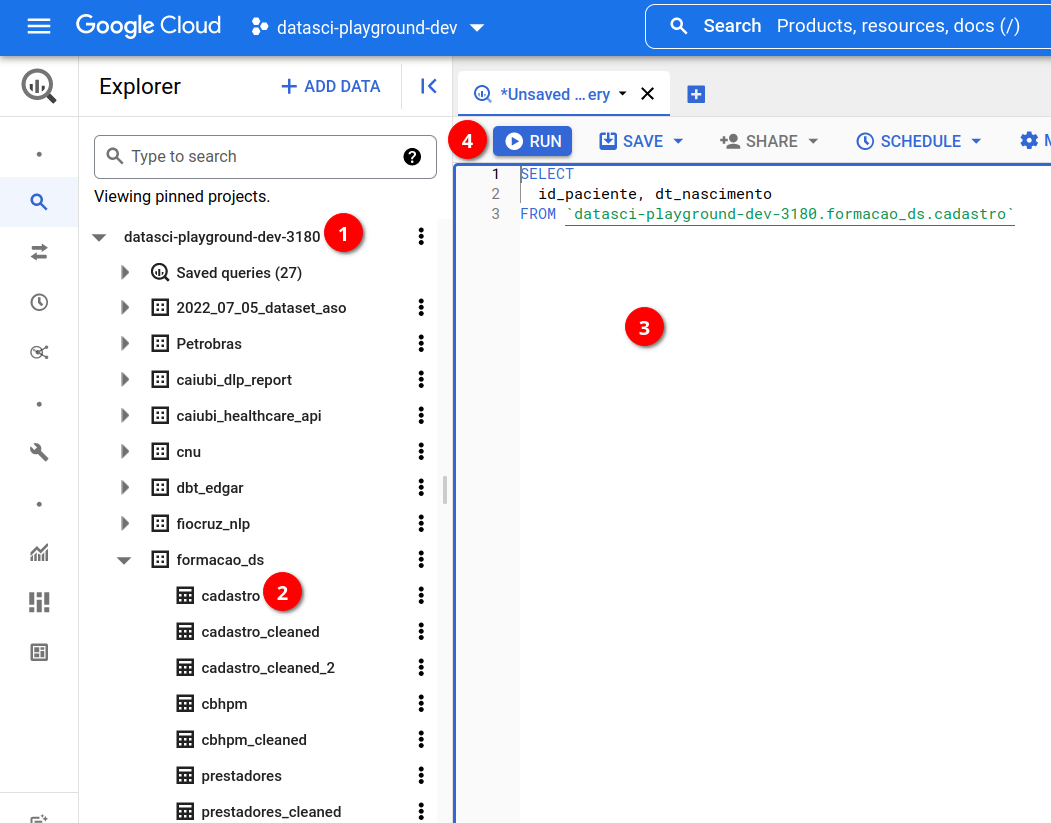

Onde a numeração indica

1) O projeto atual com uma lista de seus datasets\
2) Expandindo um dataset temos uma lista de tabelas sob este.\
3) Um editor de texto para colocarmos códigos SQL a serem executados nas tabelas à esquerda\
4) Botão de execução para o código no editor

Veja que coloquei no editor o primeiro código visto nesse notebook. Apenas removi a linha correspondente ao comando magic. Além disso, se seguirmos o caminho dado no comando `FROM` (que tem formato `projeto.dataset.tabela`) chegaremos exatamente na tabela de cadastro a qual estamos fazendo as operações.

Experimente clicar na tabela: uma nova aba será aberta a direita e podemos checar o *Schema* da tabela, seus detalhes e até visualizar os dados na aba *Preview*.

**Agora você está pronto para dominar o SQL e usá-lo no BigQuery!**

# Dúvidas

Qualquer dúvidas não hesite em manda-las para algum de seus colegas pois estamos todos sempre dispostos a ajudar!